In [ ]:
import string

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Machine_Learning/email_classification.csv')

In [ ]:
data

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham
...,...,...
174,We're pleased to inform you that your refund h...,ham
175,Get rich quick! Invest in our revolutionary ne...,spam
176,Your free trial period is ending soon. Upgrade...,ham
177,Your order is on its way! Track your shipment ...,ham


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   179 non-null    object
 1   label   179 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB


In [ ]:
data.dropna(inplace=True)

In [ ]:
data['email'] = data['email'].apply(lambda x: x.replace('\r\n', ' '))

In [ ]:
stemmer=PorterStemmer()

In [ ]:
stemmer.stem('Application')
corpus=[]
stopwords_set=set(stopwords.words('english'))

In [ ]:
# Preprocessing the emails
for i in range(len(data)):
    email = data.iloc[i]['email']
    email = email.translate(str.maketrans('', '', string.punctuation))
    tokens = email.split()
    tokens = [stemmer.stem(word.lower()) for word in tokens if word.lower() not in stopwords_set]
    cleaned_email = ' '.join(tokens)
    corpus.append(cleaned_email)

In [ ]:
# Feature extraction using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()

In [ ]:
# Targeting variable
y = data['label']
le = LabelEncoder()
y = le.fit_transform(y)

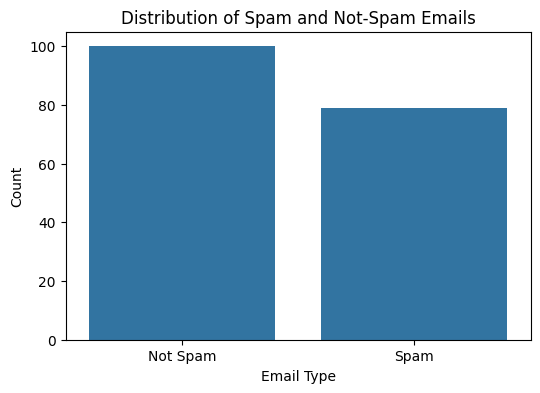

In [ ]:
# Plotting the distribution of spam and not-spam emails
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Not-Spam Emails')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Spam', 'Spam'])  # Assuming 0 is Not Spam and 1 is Spam
plt.show()

In [ ]:
# Splittng the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
# Training Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

Naive Bayes Classifier:
Accuracy: 0.9166666666666666
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.79      1.00      0.88        11

    accuracy                           0.92        36
   macro avg       0.89      0.94      0.91        36
weighted avg       0.93      0.92      0.92        36



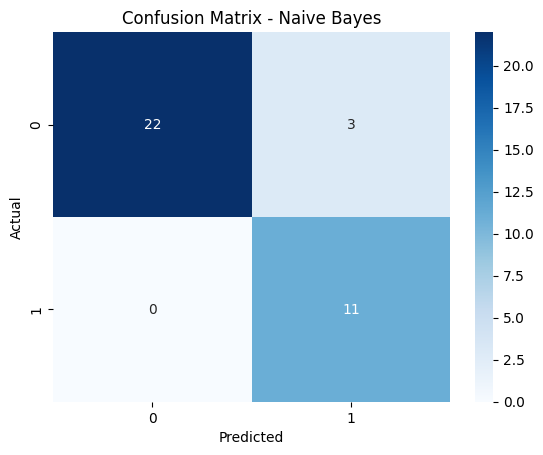

In [ ]:
# Predictions and evaluation for Naive Bayes
y_pred_nb = nb_classifier.predict(X_test)
print("Naive Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Train SVM Classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

SVM Classifier:
Accuracy: 0.9444444444444444
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.91      0.91      0.91        11

    accuracy                           0.94        36
   macro avg       0.93      0.93      0.93        36
weighted avg       0.94      0.94      0.94        36



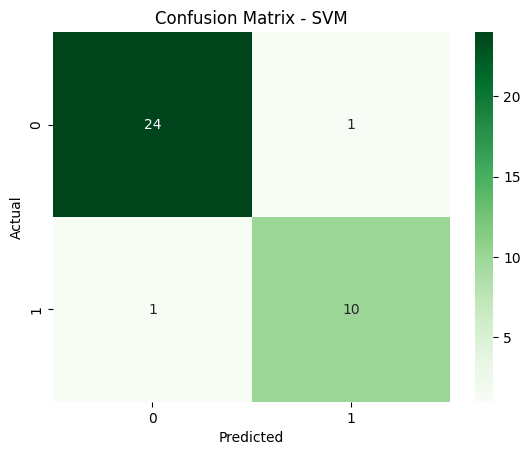

In [ ]:
# Predictions and evaluation for SVM
y_pred_svm = svm_classifier.predict(X_test)
print("SVM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()